In [470]:
# KNN Classifier 
import pandas as pd 
data = pd.read_csv(r"C:\Users\ML Lab\Downloads\datset1.csv")
print(data)

        Name  Age  Gender Class of sports
0       ajay   36       0        football
1       mark   36       0         neither
2       sara   20       1         cricket
3      zaira   30       1         cricket
4     sachin   44       0         neither
5       neha   41       1         cricket
6        dev   49       0        football
7       riya   48       1         cricket
8      karan   37       0         neither
9     aditya   41       0         cricket
10    mihira   54       1         cricket
11    kinara   37       1        football
12    bhavya   42       1         neither
13     vinay   32       0         neither
14     ramya   42       1        football
15     kavya   39       1         cricket
16  surendra   39       0         cricket
17      hema   53       1        football
18    harika   57       1         cricket
19   vagdevi   42       1        football


In [458]:
X = data.iloc[:,1:3]
y = data.iloc[:,-1]
print(X)
print(y)

    Age  Gender
0    36       0
1    36       0
2    20       1
3    30       1
4    44       0
5    41       1
6    49       0
7    48       1
8    37       0
9    41       0
10   54       1
11   37       1
12   42       1
13   32       0
14   42       1
15   39       1
16   39       0
17   53       1
18   57       1
19   42       1
0     football
1      neither
2      cricket
3      cricket
4      neither
5      cricket
6     football
7      cricket
8      neither
9      cricket
10    creicket
11    football
12     neither
13     neither
14    football
15     cricket
16     cricket
17    football
18     cricket
19    football
Name: Class of sports, dtype: object


In [459]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(X.iloc[:,0])
X.iloc[:,0] = le.transform(X.iloc[:,0])
print(X)

    Age  Gender
0     3       0
1     3       0
2     0       1
3     1       1
4     8       0
5     6       1
6    10       0
7     9       1
8     4       0
9     6       0
10   12       1
11    4       1
12    7       1
13    2       0
14    7       1
15    5       1
16    5       0
17   11       1
18   13       1
19    7       1


In [460]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 2)
(4, 2)
(16,)
(4,)


In [461]:
# #feature Scaling  
# from sklearn.preprocessing import StandardScaler    
# st= StandardScaler()    
# X_train= st.fit_transform(X_train)    
# X_test= st.transform(X_test)  

In [462]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=2, metric='euclidean', p=2)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [463]:
classifier.predict([[7,0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['football'], dtype=object)

In [464]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
print(y_pred)

['football' 'football' 'cricket' 'cricket']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [465]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1 0 0]
 [0 1 0]
 [1 1 0]]


In [466]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred,average=None)
rec = recall_score(y_test,y_pred,average=None)
f1 = f1_score(y_test,y_pred,average=None)
print("Accuracy score : ",acc)
print("Precison score : ",pre)
print("Recall score : ",pre)
print("f1 score : ",pre)

Accuracy score :  0.5
Precison score :  [0.5 0.5 0. ]
Recall score :  [0.5 0.5 0. ]
f1 score :  [0.5 0.5 0. ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

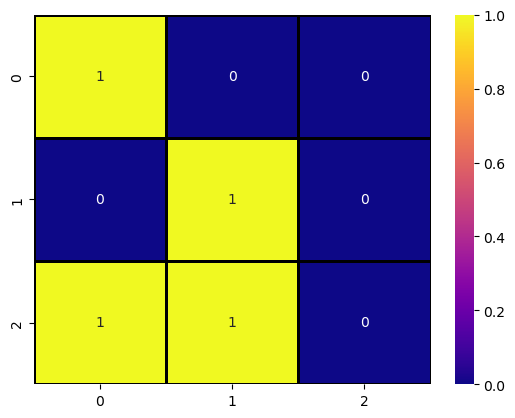

In [469]:
import seaborn as sns
sns.heatmap(cm, annot = True, cmap ='plasma',
			linecolor ='black', linewidths = 1)
